<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/quantization/AirLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRLLM

AirLLM optimizes inference memory usage, allowing 70B large language models to run inference on a single 4GB GPU card. No quantization, distillation, pruning or other model compression techniques that would result in degraded model performance are needed.

### https://pypi.org/project/airllm/

https://github.com/lyogavin/Anima/tree/main/air_llm


What is the differences between model compression and quantization?
Quantization normally needs to quantize both weights and activations to really speed things up. Which makes it harder to maintain accuracy and avoid the impact of outliers in all kinds of inputs.

While in our case the bottleneck is mainly at the disk loading, we only need to make the model loading size smaller. So we get to only quantize the weights part, which is easier to ensure the accuracy.



@Citation Author
```@software{airllm2023,
  author = {Gavin Li},
  title = {AirLLM: scaling large language models on low-end commodity computers},
  url = {https://github.com/lyogavin/Anima/tree/main/air_llm},
  version = {0.0},
  year = {2023},
}



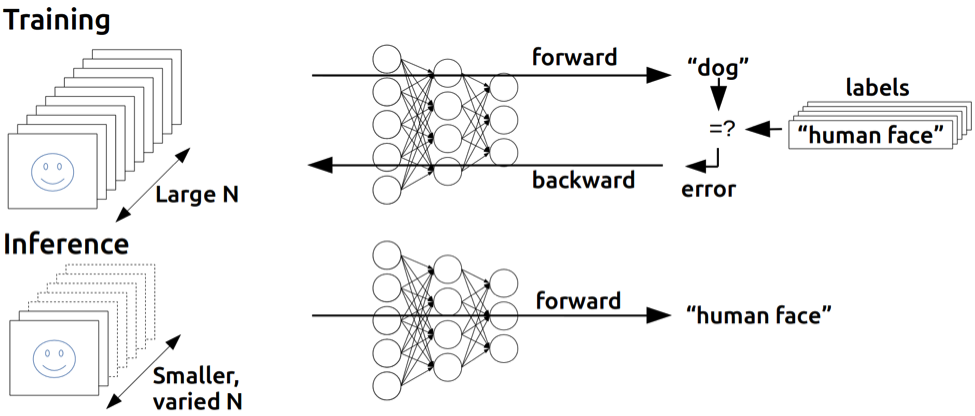

In [1]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [1]:
!pip install -U airllm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
from airllm import AutoModel
import datetime


time1 = datetime.datetime.now()

MAX_LENGTH = 128
# could use hugging face model repo id:
model = AutoModel.from_pretrained("garage-bAInd/Platypus2-7B", profiling_mode=True)
#model = AirLLMLlama2("garage-bAInd/Platypus2-7B", profiling_mode=False)

# or use model's local path...
#model = AirLLMLlama2("/home/ubuntu/.cache/huggingface/hub/models--garage-bAInd--Platypus2-70B-instruct/snapshots/b585e74bcaae02e52665d9ac6d23f4d0dbc81a0f")

input_text = [

        'What it is the capital of Italy?',
    ]



>>>> cache_utils installed


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.35k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Best_Platty_small.jpeg:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Loading shard 1/2


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.embed_tokens.safetensors


  3%|▎         | 1/35 [02:30<1:25:19, 150.57s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.0.safetensors


  6%|▌         | 2/35 [02:31<34:25, 62.60s/it]   

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.1.safetensors


  9%|▊         | 3/35 [02:32<18:25, 34.56s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.2.safetensors


 11%|█▏        | 4/35 [02:34<11:05, 21.48s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.3.safetensors


 14%|█▍        | 5/35 [02:35<07:03, 14.13s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.4.safetensors


 17%|█▋        | 6/35 [02:36<04:39,  9.65s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.5.safetensors


 20%|██        | 7/35 [02:37<03:11,  6.83s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.6.safetensors


 23%|██▎       | 8/35 [02:38<02:18,  5.14s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.7.safetensors


 26%|██▌       | 9/35 [02:40<01:41,  3.91s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.8.safetensors


 29%|██▊       | 10/35 [02:40<01:14,  2.99s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.9.safetensors


 31%|███▏      | 11/35 [02:42<00:57,  2.41s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.10.safetensors


 34%|███▍      | 12/35 [02:42<00:45,  1.96s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.11.safetensors


 37%|███▋      | 13/35 [02:44<00:37,  1.72s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.12.safetensors


 43%|████▎     | 15/35 [02:46<00:28,  1.42s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.13.safetensors
saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.14.safetensors


 46%|████▌     | 16/35 [02:47<00:24,  1.28s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.15.safetensors


 49%|████▊     | 17/35 [02:48<00:21,  1.21s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.16.safetensors


 51%|█████▏    | 18/35 [02:49<00:20,  1.22s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.17.safetensors


 54%|█████▍    | 19/35 [02:53<00:33,  2.08s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.18.safetensors


 57%|█████▋    | 20/35 [02:55<00:28,  1.92s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.19.safetensors


 60%|██████    | 21/35 [02:56<00:24,  1.75s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.20.safetensors


 63%|██████▎   | 22/35 [02:57<00:19,  1.53s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.21.safetensors


 66%|██████▌   | 23/35 [02:58<00:17,  1.46s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.22.safetensors


 69%|██████▊   | 24/35 [03:00<00:16,  1.46s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.23.safetensors


 71%|███████▏  | 25/35 [03:03<00:19,  1.99s/it]

Loading shard 2/2


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.24.safetensors


 74%|███████▍  | 26/35 [03:59<02:43, 18.14s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.25.safetensors


 77%|███████▋  | 27/35 [04:00<01:44, 13.01s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.26.safetensors


 80%|████████  | 28/35 [04:01<01:05,  9.42s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.27.safetensors


 83%|████████▎ | 29/35 [04:02<00:41,  6.89s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.28.safetensors


 86%|████████▌ | 30/35 [04:03<00:25,  5.13s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.29.safetensors


 89%|████████▊ | 31/35 [04:04<00:15,  3.92s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.30.safetensors


 91%|█████████▏| 32/35 [04:05<00:09,  3.11s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.layers.31.safetensors


 94%|█████████▍| 33/35 [04:10<00:07,  3.52s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/model.norm.safetensors


 97%|█████████▋| 34/35 [04:10<00:02,  2.54s/it]

saved as: /root/.cache/huggingface/hub/models--garage-bAInd--Platypus2-7B/snapshots/6530478f705b1a4e0d81b844148ddc237edfe1dd/splitted_model/lm_head.safetensors


100%|██████████| 35/35 [04:11<00:00,  7.19s/it]


new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


In [3]:
input_tokens = model.tokenizer(input_text,
    return_tensors="pt",
    return_attention_mask=False,
    truncation=True,
    max_length=MAX_LENGTH,
    #padding=True
    )

generation_output = model.generate(
    input_tokens['input_ids'].cuda(),
    max_new_tokens=10,
    use_cache=True,
    return_dict_in_generate=True)

response = model.tokenizer.decode(generation_output.sequences[0])
time2 = datetime.datetime.now()

(time2-time1).seconds

new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]


total time for load_safe_tensor: 0.05764302187841963
total time for compression_time: 0.0014342409999983374
total time for pin_memory_to_trigger_load: 9.557254076004028
total time for load_safe_tensor_cpu_wait: 1.075258493423462
total time for create_layer_from_state_dict: 3.073653221130371
total time for kick_off_load_cpu: 0.002015829086303711
total infer process time(including all above plus gpu compute): 23.6516
total infer wall time(including all above plus gpu compute): 15.6232
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:14<00:00,  2.40it/s]


total time for load_safe_tensor: 0.34707536980172904
total time for compression_time: 0.0013457270000287735
total time for pin_memory_to_trigger_load: 9.484052658081055
total time for load_safe_tensor_cpu_wait: 1.6665103435516357
total time for create_layer_from_state_dict: 3.072176218032837
total time for kick_off_load_cpu: 0.002083301544189453
total infer process time(including all above plus gpu compute): 24.0114
total infer wall time(including all above plus gpu compute): 15.6432
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]


total time for load_safe_tensor: 0.34413607691772086
total time for compression_time: 0.0021177950000037526
total time for pin_memory_to_trigger_load: 9.43972635269165
total time for load_safe_tensor_cpu_wait: 1.0232677459716797
total time for create_layer_from_state_dict: 3.087812900543213
total time for kick_off_load_cpu: 0.0020148754119873047
total infer process time(including all above plus gpu compute): 23.3446
total infer wall time(including all above plus gpu compute): 14.8632
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.53it/s]


total time for load_safe_tensor: 0.3333470783187238
total time for compression_time: 0.0013523140000017975
total time for pin_memory_to_trigger_load: 9.486311912536621
total time for load_safe_tensor_cpu_wait: 0.950127363204956
total time for create_layer_from_state_dict: 3.064168691635132
total time for kick_off_load_cpu: 0.001953601837158203
total infer process time(including all above plus gpu compute): 23.3002
total infer wall time(including all above plus gpu compute): 14.8822
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.54it/s]


total time for load_safe_tensor: 0.33595546587324066
total time for compression_time: 0.0018154730000503605
total time for pin_memory_to_trigger_load: 9.463923454284668
total time for load_safe_tensor_cpu_wait: 0.9679584503173828
total time for create_layer_from_state_dict: 3.0655059814453125
total time for kick_off_load_cpu: 0.0019526481628417969
total infer process time(including all above plus gpu compute): 23.1843
total infer wall time(including all above plus gpu compute): 14.7918
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.54it/s]


total time for load_safe_tensor: 0.3268516485964881
total time for compression_time: 0.0015658910000695414
total time for pin_memory_to_trigger_load: 9.444705724716187
total time for load_safe_tensor_cpu_wait: 1.0148801803588867
total time for create_layer_from_state_dict: 3.066967725753784
total time for kick_off_load_cpu: 0.0020024776458740234
total infer process time(including all above plus gpu compute): 23.0109
total infer wall time(including all above plus gpu compute): 14.7625
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.61it/s]


total time for load_safe_tensor: 0.35329121246439854
total time for compression_time: 0.002401650999956928
total time for pin_memory_to_trigger_load: 9.131879806518555
total time for load_safe_tensor_cpu_wait: 0.9160728454589844
total time for create_layer_from_state_dict: 3.0500707626342773
total time for kick_off_load_cpu: 0.0018947124481201172
total infer process time(including all above plus gpu compute): 22.7969
total infer wall time(including all above plus gpu compute): 14.5165
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.59it/s]


total time for load_safe_tensor: 0.32007525946164606
total time for compression_time: 0.0011363170001459366
total time for pin_memory_to_trigger_load: 9.255875825881958
total time for load_safe_tensor_cpu_wait: 0.9831545352935791
total time for create_layer_from_state_dict: 3.0433692932128906
total time for kick_off_load_cpu: 0.001939535140991211
total infer process time(including all above plus gpu compute): 22.8740
total infer wall time(including all above plus gpu compute): 14.4799
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.63it/s]


total time for load_safe_tensor: 0.322906461527225
total time for compression_time: 0.0024688569999966603
total time for pin_memory_to_trigger_load: 9.050447463989258
total time for load_safe_tensor_cpu_wait: 0.9216141700744629
total time for create_layer_from_state_dict: 3.0493886470794678
total time for kick_off_load_cpu: 0.0018818378448486328
total infer process time(including all above plus gpu compute): 22.3666
total infer wall time(including all above plus gpu compute): 14.3253
new version of transfomer, no need to use BetterTransformer, try setting attn impl to sdpa...
attn imp: <class 'transformers.models.llama.modeling_llama.LlamaSdpaAttention'>


running layers(self.running_device): 100%|██████████| 35/35 [00:13<00:00,  2.62it/s]

total time for load_safe_tensor: 0.3123367280965681
total time for compression_time: 0.001650526999867452
total time for pin_memory_to_trigger_load: 9.078601598739624
total time for load_safe_tensor_cpu_wait: 0.981860876083374
total time for create_layer_from_state_dict: 3.0395138263702393
total time for kick_off_load_cpu: 0.0017805099487304688
total infer process time(including all above plus gpu compute): 22.6692
total infer wall time(including all above plus gpu compute): 14.3017


1133

In [4]:
response

'<s> What it is the capital of Italy?\n\nThe capital of Italy is Rome.\n'

In [ ]:
#from airllm import AutoModel

# MAX_LENGTH = 128

# # load the model from the Hugging Face hub
# model = AutoModel.from_pretrained("garage-bAInd/Platypus2-70B-instruct", profiling_mode=True)

In [ ]:
# prepare the input text
# input_text = [
#     'What is the capital of United States?',
# ]

# # tokenize the input text
# input_tokens = model.tokenizer(input_text,
#     return_tensors="pt",
#     return_attention_mask=False,
#     truncation=True,
#     max_length=MAX_LENGTH,
#     padding=False)